<a href="https://colab.research.google.com/github/mrtkp9993/FinanceExamplesPy/blob/main/01_calculate_alpha_and_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install arch

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from arch.unitroot import VarianceRatio
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [3]:
kozaa = yf.download("KOZAA.IS", period = "max", start = "2006-01-03")
bist30 = yf.download("XU030.IS", period = "max", start = "2006-01-03")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# fixing data
# Fix bist30 data 
# 2020-07-19
bist30.loc[:"2020-07-24"] = bist30.loc[:"2020-07-24"] / 100

# Fix bist30 missing data
bist30 = bist30.reindex(kozaa.index.values, method="pad")

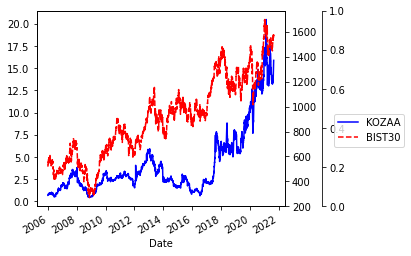

In [5]:
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

kozaa['Adj Close'].plot(ax=ax, style='b-')
bist30['Adj Close'].plot(ax=ax, style='r--', secondary_y=True)
ax3.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['KOZAA','BIST30'], bbox_to_anchor=(1.5, 0.5))

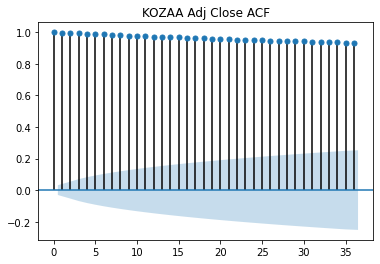

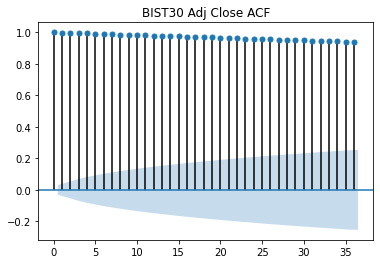

In [6]:
plot_acf(kozaa['Adj Close'], title="KOZAA Adj Close ACF")
plot_acf(bist30['Adj Close'], title="BIST30 Adj Close ACF")
plt.show()

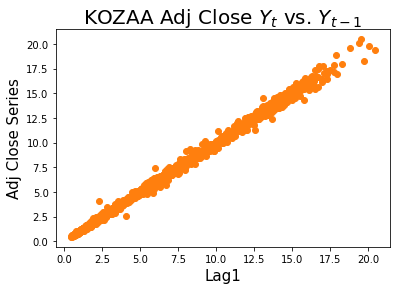

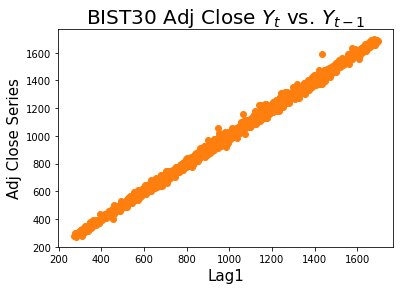

In [7]:
fig,ax = plt.subplots()
_ = ax.scatter(kozaa['Adj Close'],kozaa['Adj Close'].shift(1),color='C1')
_ = ax.set_xlabel('Lag1',fontsize = 15)
_ = ax.set_ylabel('Adj Close Series',fontsize = 15)
_ = ax.set_title('KOZAA Adj Close $Y_t$ vs. $Y_{t-1}$',fontsize = 20)

fig,ax = plt.subplots()
_ = ax.scatter(bist30['Adj Close'],bist30['Adj Close'].shift(1),color='C1')
_ = ax.set_xlabel('Lag1',fontsize = 15)
_ = ax.set_ylabel('Adj Close Series',fontsize = 15)
_ = ax.set_title('BIST30 Adj Close $Y_t$ vs. $Y_{t-1}$',fontsize = 20)

plt.show()

In [38]:
# Returns
kozaa_ret = (np.log(kozaa['Adj Close']) - np.log(kozaa['Adj Close'].shift(1))).dropna()
bist30_ret = (np.log(bist30['Adj Close']) - np.log(bist30['Adj Close'].shift(1))).dropna()

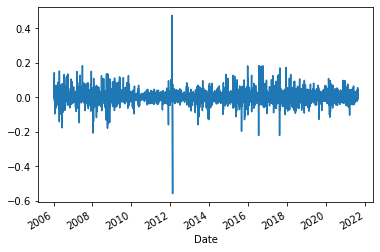

In [39]:
kozaa_ret.plot()

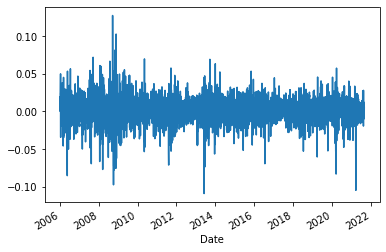

In [40]:
bist30_ret.plot()

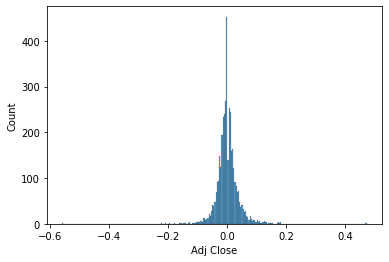

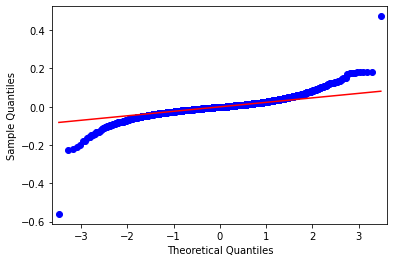

In [41]:
sns.histplot(kozaa_ret)
qqplot(kozaa_ret, line="q")
plt.show()

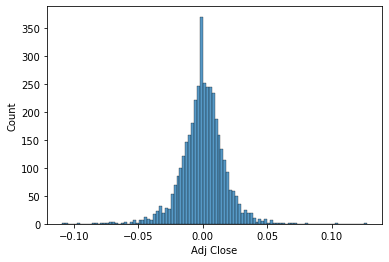

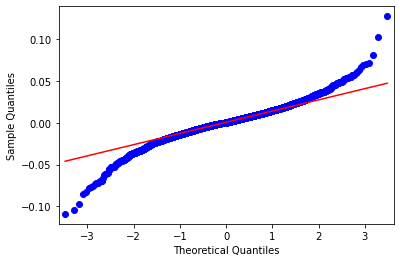

In [42]:
sns.histplot(bist30_ret)
qqplot(bist30_ret, line="q")
plt.show()

In [43]:
VarianceRatio(kozaa_ret, 252)

Test Statistic,-3.079
P-value,0.002
Lags,252


In [44]:
VarianceRatio(bist30_ret, 252)

Test Statistic,-3.032
P-value,0.002
Lags,252


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


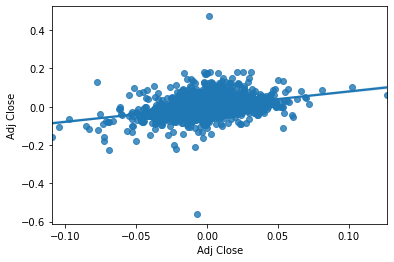

In [45]:
sns.regplot(bist30_ret, kozaa_ret)

In [46]:
# Normalize returns
kozaa_ret = (kozaa_ret - np.mean(kozaa_ret)) / np.std(kozaa_ret)
bist30_ret = (bist30_ret - np.mean(bist30_ret)) / np.std(bist30_ret)
bist30_ret = add_constant(bist30_ret)

lm = OLS(kozaa_ret, bist30_ret)
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     619.2
Date:                Sun, 29 Aug 2021   Prob (F-statistic):          3.78e-127
Time:                        18:50:22   Log-Likelihood:                -5358.1
No. Observations:                3979   AIC:                         1.072e+04
Df Residuals:                    3977   BIC:                         1.073e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.513e-17      0.015  -3.06e-15      1.000      -0.029       0.029
Adj Close      0.3670      0.015     24.883      0.000       0.338       0.396
==============================================================================
Omnibus:                     1170.878   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           156005.370
Skew:                           0.160   Prob(JB):                         0.00
Kurtosis:                      33.674   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""